<a href="https://colab.research.google.com/github/DreenTS/NeuroEducation/blob/master/%D0%9E%D0%B1%D0%BD%D0%B0%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%84%D0%B0%D0%BB%D1%8C%D1%88%D0%B8%D0%B2%D1%8B%D1%85_%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

Задача -  используя библиотеку sklearn построить модель классического машинного обучения, которая может с точностью более 90% определять, является ли новость реальной (REAL) или фальшивой (FAKE).

Изучить и применить к задаче TfidfVectorizer для извлечения признаков из текстовых данных и PassiveAggressiveClassifier.

Построить матрицу ошибок (confusion matrix).

## Импорт необходимых библиотек, классов, функций

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Функция для разделения модели на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split

# Модель обучения Пассивно-агрессивный классификатор
from sklearn.linear_model import PassiveAggressiveClassifier

# Функция для оценки точности модели
from sklearn.metrics import accuracy_score

# Функция для построение матрицы ошибок
from sklearn.metrics import confusion_matrix

## Загрузка и подготовка датасета

In [ ]:
# Загрузка датасета
df = pd.read_csv('/content/fake_news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


В датасете есть поле **label**, в котором указывается, является ли новость настоящей или же фейком. Данное поле является меткой класса. Значит, примем это поле за значения **Y**.

При этом поле **"Unnamed: 0"** не несёт в себе вообще никакой полезной информации. Было предположение, что оно как коррелирует с длиной текста новости, но это не подтвердилось:

In [ ]:
f'{len(df.iloc[0].text)} <> {df.iloc[0]["Unnamed: 0"]}'

'7518 <> 8476'

Итак, нам необходимы только два поля: **label** и **text**.

In [ ]:
df = df.drop(labels=['Unnamed: 0', 'title'], axis=1)

## Создание и обучение модели

In [ ]:
# Подготовка данных
X = df['text']
y = df['label']

# Преобразуем текст в числовые признаки с помощью TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=13)

# Создаем модель обучения PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=50)
# Обучаем классификатор
classifier.fit(X_train, y_train)

# Делаем предсказание на тестовом наборе и оценка точности модели
y_pred = classifier.predict(X_test)

# Выводим оценку точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy*100:.2f}%')

Точность модели: 94.43%


## Построение матрицы ошибок

In [ ]:
def show_confusion_matrix(test_labels, test_classes):
  # Вычисление матрицы ошибок и ее нормализация
  plt.figure(figsize=(3,3))
  confusion = sk_metrics.confusion_matrix(test_labels,
                                          test_classes)
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(3)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title("Матрица ошибок")
  plt.ylabel("Истинные метки")
  plt.xlabel("Предсказанные метки")

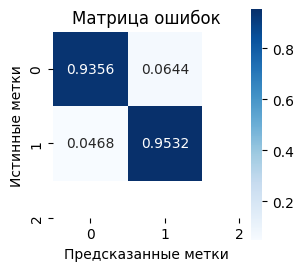

In [ ]:
show_confusion_matrix(y_test, y_pred)